<a href="https://colab.research.google.com/github/griffinsnest/Data-Final-project/blob/main/Baxter_Cleaning_Enron_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#library for processing objects structured like emails
import email


### Load Data

In [ ]:
#Uncomment out first line of code and comment out second line below to see results of first final project code cell.
#Leave it as it is now and simply runn all code cells besides first one under final project code to see result of NewData tests.
#df = pd.read_csv("/content/final_proj_data.csv")
df = pd.read_csv("/content/NewData.csv")

### Data Exploration

In [ ]:
# view first 5 rows of the dataset
df.head()

,Unnamed: 0,Unnamed,file,message,label
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0
3,3,4,allen-p/all_documents/260.,Message-ID: <14437034.1075855671174.JavaMail.e...,0.0
4,4,5,arnold-j/deleted_items/702.,Message-ID: <21959484.1075861667058.JavaMail.e...,0.0


In [ ]:
# get shape of the data
df.shape

(10000, 5)

In [ ]:
# a sample email
print(df.loc[1]['message'])

Message-ID: <7027882.1075858635275.JavaMail.evans@thyme>
Date: Wed, 24 Oct 2001 21:45:42 -0700 (PDT)
From: book-news@amazon.com
To: pallen@enron.com
Subject: Save 30% on "How People Grow : What the Bible Reveals About
 Personal Growth" by Henry Cloud
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: quoted-printable
X-From: "Amazon.com" <book-news@amazon.com>@ENRON
X-To: pallen@enron.com
X-cc: 
X-bcc: 
X-Folder: \PALLEN (Non-Privileged)\Allen, Phillip K.\Deleted Items
X-Origin: Allen-P
X-FileName: PALLEN (Non-Privileged).pst


[IMAGE] =09


    Search   BooksAll Products  for         Dear Amazon.com Customer,  As s=
omeone who has purchased books by Henry Cloud in the past, you might  like =
to know that How People Grow : What the Bible Reveals About  Personal Growt=
h is now available.  You can order your copy at a savings  of 30% by follow=
ing the link below.      [IMAGE]  How  People Grow : What the Bible Reveals=
 About Personal Growth  List P

In [ ]:
# transform the email into correct format
message = df.loc[1]['message']
#uses the new library 'email'
e = email.message_from_string(message)

e.items()

[('Message-ID', '<7027882.1075858635275.JavaMail.evans@thyme>'),
 ('Date', 'Wed, 24 Oct 2001 21:45:42 -0700 (PDT)'),
 ('From', 'book-news@amazon.com'),
 ('To', 'pallen@enron.com'),
 ('Subject',
  'Save 30% on "How People Grow : What the Bible Reveals About\r\n Personal Growth" by Henry Cloud'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', 'quoted-printable'),
 ('X-From', '"Amazon.com" <book-news@amazon.com>@ENRON'),
 ('X-To', 'pallen@enron.com'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', '\\PALLEN (Non-Privileged)\\Allen, Phillip K.\\Deleted Items'),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'PALLEN (Non-Privileged).pst')]

In [ ]:
# get date
e.get('Date')

'Wed, 24 Oct 2001 21:45:42 -0700 (PDT)'

In [ ]:
# show message body
e.get_payload()

'\r\n[IMAGE] =09\r\n\r\n\r\n    Search   BooksAll Products  for         Dear Amazon.com Customer,  As s=\r\nomeone who has purchased books by Henry Cloud in the past, you might  like =\r\nto know that How People Grow : What the Bible Reveals About  Personal Growt=\r\nh is now available.  You can order your copy at a savings  of 30% by follow=\r\ning the link below.      [IMAGE]  How  People Grow : What the Bible Reveals=\r\n About Personal Growth  List Price:  $19.99  Our Price: $13.99  You Save: $=\r\n6.00  (30%)    [IMAGE]   Amazon.com Whether you\'re hoping to achieve person=\r\nal and spiritual growth or are  looking for guidance to help others, you\'ll=\r\n find practical and proven  wisdom in Drs. Henry Cloud and John Townsend\'s =\r\nHow People Grow: What the  Bible Reveals About Personal Growth. Starting wi=\r\nth the premise that all  growth is spiritual growth, the authors then expou=\r\nnd on the concept. Cloud  postulates that we spend too much time focusing o=\r\nn problem

### Extract headers

In [ ]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [ ]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea..."
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner


### Extract Message Body

In [ ]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner,Credit lines are like bandwidth. Create the c...


### Employee Names

In [ ]:
df['file'][:10]

0    badeer-r/discussion_threads/212.
1          allen-p/deleted_items/189.
2         arnold-j/all_documents/331.
3          allen-p/all_documents/260.
4         arnold-j/deleted_items/702.
5            arnold-j/_sent_mail/478.
6         arnold-j/all_documents/168.
7            arnold-j/sent_items/300.
8          allen-p/deleted_items/381.
9          allen-p/deleted_items/353.
Name: file, dtype: object

In [ ]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body,employee
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,"Thu, 24 Aug 2000 09:55:00 -0700 (PDT)",Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...,badeer-r
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,"Wed, 24 Oct 2001 21:45:42 -0700 (PDT)","Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...,allen-p
2,2,3,arnold-j/all_documents/331.,Message-ID: <23580308.1075857574590.JavaMail.e...,0.0,"Wed, 4 Oct 2000 01:23:00 -0700 (PDT)",Re: ABN,\John_Arnold_Dec2000\Notes Folders\All documents,John Arnold,Sarah Wesner,Credit lines are like bandwidth. Create the c...,arnold-j


### Look into X-Folder

In [ ]:
print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  10000
number of unique folders:  125


In [ ]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,"\JARNOLD (Non-Privileged)\Arnold, John\Deleted...",688
1,"\JARNOLD (Non-Privileged)\Arnold, John\Sent Items",679
2,\John_Arnold_Jun2001\Notes Folders\All documents,464
3,\John_Arnold_Dec2000\Notes Folders\All documents,438
4,\John_Arnold_Jun2001\Notes Folders\'sent mail,420
5,\John_Arnold_Jun2001\Notes Folders\Sent,420
6,\John_Arnold_Dec2000\Notes Folders\'sent mail,394
7,\John_Arnold_Dec2000\Notes Folders\Sent,394
8,\Phillip_Allen_Dec2000\Notes Folders\All docum...,353
9,"\Susan_Bailey_Mar2002\Bailey, Susan\Deleted Items",348


### Visualize top 20 folders

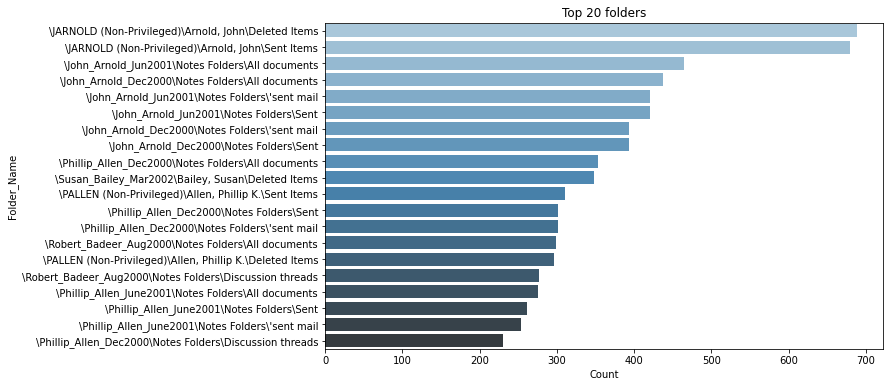

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

**Let's see top 20 highest email sender employee**

In [ ]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,arnold-j,4898
1,allen-p,3034
2,badeer-r,877
3,arora-h,654
4,bailey-s,478
5,bass-e,59


**Visualize top 20 highest email sender employees**

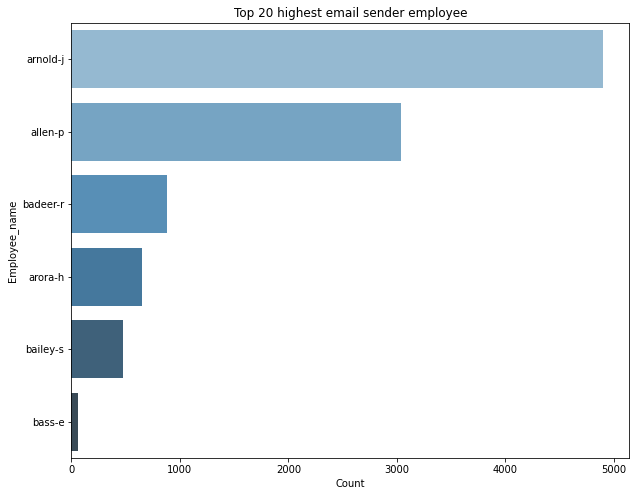

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

## Data Cleaning and Transformation

**date : column**

In [ ]:
import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [ ]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)


,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body,employee
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,24-08-2000 09:55:00,Total Transfer Capabilities,\Robert_Badeer_Aug2000\Notes Folders\Discussio...,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...,badeer-r
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,24-10-2001 21:45:42,"Save 30% on ""How People Grow : What the Bible ...","\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...","""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...,allen-p


**Column : X-Folder**

In [ ]:
print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Robert_Badeer_Aug2000\Notes Folders\Discussion threads


'Discussion threads'

In [ ]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

,Unnamed: 0,Unnamed,file,message,label,date,subject,X-Folder,X-From,X-To,body,employee
0,0,1,badeer-r/discussion_threads/212.,Message-ID: <13581696.1075863601488.JavaMail.e...,0.0,24-08-2000 09:55:00,Total Transfer Capabilities,discussion threads,"""Neeley, Myrna"" <MNeeley@caiso.com>","Market Status <MarketStatus@caiso.com>, PX Rea...",Attached are the Total Transfer Capabilities (...,badeer-r
1,1,2,allen-p/deleted_items/189.,Message-ID: <7027882.1075858635275.JavaMail.ev...,0.0,24-10-2001 21:45:42,"Save 30% on ""How People Grow : What the Bible ...",deleted items,"""Amazon.com"" <book-news@amazon.com>@ENRON",pallen@enron.com,\r\n[IMAGE] =09\r\n\r\n\r\n Search BooksA...,allen-p


In [ ]:
# count unique folders
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

Unique Foldes:  64


array(['discussion threads', 'deleted items', 'all documents',
       "'sent mail", 'sent items', 'sent', 'hp', 'inbox', 'notes inbox',
       'avaya', 'vanderbilt', 'tasks', 'bmc', 'california', 'hist-vols',
       'saved mail', 'savedmail', 'dell', 'sony', 'compaq'], dtype=object)

**Replace empty missing values in subject with np.nan**

In [ ]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [ ]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

In [ ]:
df.isnull().sum()

Unnamed: 0       0
Unnamed          0
file             0
message          0
label            0
date             0
subject       1903
X-Folder         0
X-From           0
X-To           138
body             0
employee         0
dtype: int64

In [ ]:
# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

subject    0.1903
X-To       0.0138
dtype: float64

In [ ]:
# drop missing value rows
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum(), df.shape

(Unnamed: 0    0
 Unnamed       0
 file          0
 message       0
 label         0
 date          0
 subject       0
 X-Folder      0
 X-From        0
 X-To          0
 body          0
 employee      0
 dtype: int64, (7961, 12))

**Final PRJCT Code**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd
print(df.head())
label_encoder = LabelEncoder()

df['subject'] = label_encoder.fit_transform(df['subject'])
df['X-From'] = label_encoder.fit_transform(df['X-To'])
df['X-To'] = label_encoder.fit_transform(df['X-From'])
df['label'] = label_encoder.fit_transform(df['label'])
pandasDate = pd.to_datetime(df['date'])
df['hour'] = pandasDate.dt.hour
df['weekday'] = pandasDate.dt.weekday
tree_scores = [None]*100
depth_of_tree = [None]*100
leaves_of_tree = [None]*100
features = df[['subject', 'X-From', 'hour', 'weekday']].sample(1000)
features2 = df[['subject', 'X-From', 'X-To', 'hour', 'weekday']].sample(1000)
features3 = df[['subject', 'X-From', 'X-To']].sample(1000)
target = df['label'].sample(1000)
for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf = DecisionTreeClassifier().fit(X_train, Y_train)

  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Features1 tree information with no max depth given:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())


for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf = DecisionTreeClassifier(max_depth=15).fit(X_train, Y_train)

  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Features1 tree information at max depth of 15:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())

for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf = DecisionTreeClassifier(max_depth=10).fit(X_train, Y_train)

  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Features1 tree information at max depth of 10:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())

for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf = DecisionTreeClassifier(max_depth=100).fit(X_train, Y_train)

  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Features1 tree information at max depth of 100:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())

#tests to see other features get different results

for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(features2, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf = DecisionTreeClassifier(max_depth=15).fit(X_train, Y_train)

 
  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Features2 tree information at max depth of 15:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())

for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(features3, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf = DecisionTreeClassifier(max_depth=15).fit(X_train, Y_train)

  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Features3 tree information at max depth of 15:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())

for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(features3, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf = DecisionTreeClassifier(max_depth=10).fit(X_train, Y_train)

  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Features3 tree information at max depth of 10:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())

#Results printed show that with factors of label encoded, the most important ones are label encoded versions of
#X-To, X-From, and Subject, with the results of max depths at around 10 having further increased accuracy.
#Therfore, as shown wiht my tests the result of a decsion tree testing those three features with a max depth of 10
#will get the highest possible accuracy result I've found and thus will be used when testing the new data.

**Final Project Code: NewData results**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd
label_encoder = LabelEncoder()

df['subject'] = label_encoder.fit_transform(df['subject'])
df['X-From'] = label_encoder.fit_transform(df['X-To'])
df['X-To'] = label_encoder.fit_transform(df['X-From'])
df['label'] = label_encoder.fit_transform(df['label'])
pandasDate = pd.to_datetime(df['date'])
df['hour'] = pandasDate.dt.hour
df['weekday'] = pandasDate.dt.weekday
tree_scores = [None]*100
depth_of_tree = [None]*100
leaves_of_tree = [None]*100
orginFeatures = df[['subject', 'X-From', 'hour', 'weekday']]
optimalFeatures = df[['subject', 'X-From', 'X-To']]
target = df['label']

#Original Feature with no max depth of NewData for comparison
for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(orginFeatures, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf = DecisionTreeClassifier().fit(X_train, Y_train)

  tree_scores[i] = clf.score(X_test, Y_test)
  depth_of_tree[i] = clf.get_depth()
  leaves_of_tree[i] = clf.get_n_leaves()

print("Original Features of project tree with  no Max Depth given:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())

#optimal features and max depth Newdata method
for i in range(0,99):
  #Implement train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(optimalFeatures, target, test_size=.2) #features in Enron data = x, new data cloumn = y

  #code for Decision tree classifier
  clf2 = DecisionTreeClassifier(max_depth=10).fit(X_train, Y_train)

  tree_scores[i] = clf2.score(X_test, Y_test)
  depth_of_tree[i] = clf2.get_depth()
  leaves_of_tree[i] = clf2.get_n_leaves()

print("Omptimal Features tree information at max depth of 10:\n")
print("Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("Tree Leaves:\n", pd.Series(leaves_of_tree).describe())


Original Features of project tree with  no Max Depth given:

Tree Accuracy:
 count    99.000000
mean      0.969450
std       0.003746
min       0.959196
25%       0.966729
50%       0.969240
75%       0.971751
max       0.979912
dtype: float64
Tree Depths:
 count    99.000000
mean     24.040404
std       2.506804
min      19.000000
25%      22.500000
50%      24.000000
75%      25.000000
max      34.000000
dtype: float64
Tree Leaves:
 count     99.000000
mean     290.818182
std       10.362180
min      266.000000
25%      283.000000
50%      291.000000
75%      298.000000
max      318.000000
dtype: float64
Omptimal Features tree information at max depth of 10:

Tree Accuracy:
 count    99.000000
mean      0.977515
std       0.003605
min       0.966729
25%       0.975518
50%       0.977401
75%       0.979912
max       0.986190
dtype: float64
Tree Depths:
 count    99.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
dtype: float64
Tree L